In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
np.random.seed(42)


In [5]:
data = {
    "student_id":range(1,101),
    "hindi_score":np.random.randint(20,100,size=100),
    "english_score":np.random.randint(15,98,size=100),
    "science_score":np.random.randint(10,99,size=100),
    "attendance_percentage":np.random.uniform(70,100, size=100),
    "study_hours_per_day":np.random.uniform(1,6,size=100)
}

In [8]:
df = pd.DataFrame(data)
print("Some data\n", df.head())

Some data
    student_id  hindi_score  english_score  science_score  \
0           1           71             87             25   
1           2           34             86             82   
2           3           91             26             68   
3           4           80             48             79   
4           5           40             47             89   

   attendance_percentage  study_hours_per_day  
0              98.213758             3.458079  
1              98.617857             3.367359  
2              97.445932             1.866009  
3              81.104761             3.169258  
4              70.463698             2.992524  


In [9]:
#introducing inconsistancies

In [10]:
df.loc[10:15,"hindi_score"] = np.nan
df.loc[30:40,"english_score"] = np.nan
df.loc[50:60,"science_score"] = np.nan
df.loc[70:80,"attendance_percentage"] = np.nan

In [12]:
print("data after adding inconsistancies\n", df.head(20))

data after adding inconsistancies
     student_id  hindi_score  english_score  science_score  \
0            1         71.0           87.0           25.0   
1            2         34.0           86.0           82.0   
2            3         91.0           26.0           68.0   
3            4         80.0           48.0           79.0   
4            5         40.0           47.0           89.0   
5            6         94.0           62.0           12.0   
6            7         94.0           37.0           29.0   
7            8         43.0           76.0           68.0   
8            9         22.0           51.0           45.0   
9           10         41.0           58.0           28.0   
10          11          NaN           49.0           76.0   
11          12          NaN           79.0           28.0   
12          13          NaN           61.0           29.0   
13          14          NaN           92.0           80.0   
14          15          NaN           17.0        

In [13]:
# handling incosistancy by replacing with mean

In [17]:
df.fillna(df.mean(), inplace=True)
df[df<0]=np.nan
print(df.head(20))

    student_id  hindi_score  english_score  science_score  \
0            1    71.000000           87.0           25.0   
1            2    34.000000           86.0           82.0   
2            3    91.000000           26.0           68.0   
3            4    80.000000           48.0           79.0   
4            5    40.000000           47.0           89.0   
5            6    94.000000           62.0           12.0   
6            7    94.000000           37.0           29.0   
7            8    43.000000           76.0           68.0   
8            9    22.000000           51.0           45.0   
9           10    41.000000           58.0           28.0   
10          11    58.595745           49.0           76.0   
11          12    58.595745           79.0           28.0   
12          13    58.595745           61.0           29.0   
13          14    58.595745           92.0           80.0   
14          15    58.595745           17.0           61.0   
15          16    58.595

In [18]:
#using z score to identify and handle outliers

In [21]:
numeric_vars = ["hindi_score","english_score","science_score","attendance_percentage","study_hours_per_day",]
z_scores =(df[numeric_vars] - df[numeric_vars].mean())/df[numeric_vars].std()
outliers = (z_scores > 3) | (z_scores < -3)
df[outliers] = np.nan

print("dataset after handling outliers\n",df.head(20))

dataset after handling outliers
     student_id  hindi_score  english_score  science_score  \
0            1    71.000000           87.0           25.0   
1            2    34.000000           86.0           82.0   
2            3    91.000000           26.0           68.0   
3            4    80.000000           48.0           79.0   
4            5    40.000000           47.0           89.0   
5            6    94.000000           62.0           12.0   
6            7    94.000000           37.0           29.0   
7            8    43.000000           76.0           68.0   
8            9    22.000000           51.0           45.0   
9           10    41.000000           58.0           28.0   
10          11    58.595745           49.0           76.0   
11          12    58.595745           79.0           28.0   
12          13    58.595745           61.0           29.0   
13          14    58.595745           92.0           80.0   
14          15    58.595745           17.0          

In [22]:
# apply data transformations

# log transformation on study hours per day to decrease skewness

df["log_study_hours"] = np.log1p(df["study_hours_per_day"])

In [23]:
plt.figure(figsize = (12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'log_study_hours')

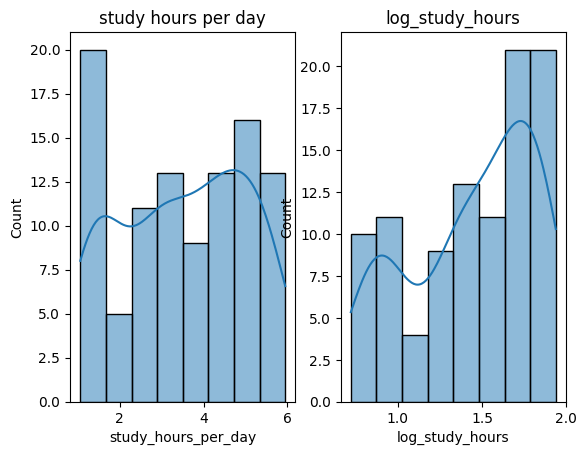

In [24]:
plt.subplot(1,2,1)
sns.histplot(df["study_hours_per_day"], kde=True)
plt.title("study hours per day")

plt.subplot(1,2,2)
sns.histplot(df["log_study_hours"], kde=True)
plt.title("log_study_hours")